 # Predicting heart disease    

# # 1. Problem definition :
Given the clinical parameters of a patient , predicting if he/she has heart disease or not
# # 2. Data:
 Original data is from UCI machine learning repository : https://archive.ics.uci.edu/ml/datasets/heart+disease
 
 Other version available on kaggle:
 https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv
 
 # # 3.Evaluation:
 
 >95% accuracy in predicting if a patient has heart disease or not.

# # 4. Features:

*data dictionary*

age
age in years

sex
(1 = male; 0 = female)

cp
chest pain type

trestbps
resting blood pressure (in mm Hg on admission to the hospital)

chol
serum cholestoral in mg/dl

fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg
resting electrocardiographic results

thalach
maximum heart rate achieved

exang
exercise induced angina (1 = yes; 0 = no)

oldpeak
ST depression induced by exercise relative to rest

slope
the slope of the peak exercise ST segment

ca
number of major vessels (0-3) colored by flourosopy

thal
3 = normal; 6 = fixed defect; 7 = reversable defect

target
1 or 0

## preparing our tools

In [1]:
#tools for EDA
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#import all the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#for model evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_roc_curve,precision_score,recall_score,f1_score


# load data

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

# EDA
 
>find more about the data, become a subject matter expert to get quick insights

EDA CHECKLIST

    1.what question(s) are you trying to solve?
    
    2.what kind of data do we have and how to treat different types?
    
    3.what is missing and how to deal with it?
    
    4.what are the outliers and why to care about them?
    
    5.how can you add, change or remove features from your data?
    

In [5]:
#find out how many of each class

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

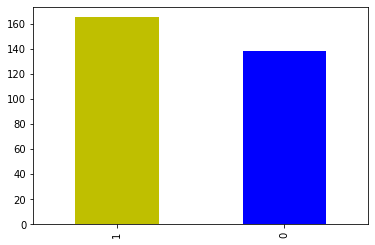

In [6]:
df['target'].value_counts().plot(kind='bar',color=['y','b']);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
df.index

RangeIndex(start=0, stop=303, step=1)

In [12]:
list(df.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [13]:
## Explore the data by comparing each column to the target variable
 
#sex:

df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [14]:
#compare sex to target column:
pd.crosstab(df['target'],df['sex'])


sex,0,1
target,,
0,24,114
1,72,93


Based on our existing dataset,
We can infer that if the patient is a woman , she has 72% of having a heart disease.

If the patient is a man , 44% chance of having a heart disease.

So on an average there is 58% of chance that a person has heart disease.

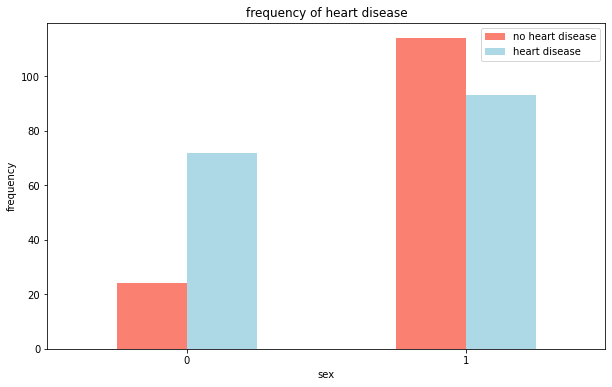

In [15]:
pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue']);
plt.title("frequency of heart disease")
plt.xlabel("sex");
plt.ylabel("frequency");
plt.legend(['no heart disease','heart disease'])
plt.xticks(rotation=0);

In [16]:
df['thalach'].value_counts()

#if you observe , length is more.
#This suggests that bar graph might not be suitable for this data.
#We could maybe use scatter plot instead.

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

Age vs thalach for heart disease

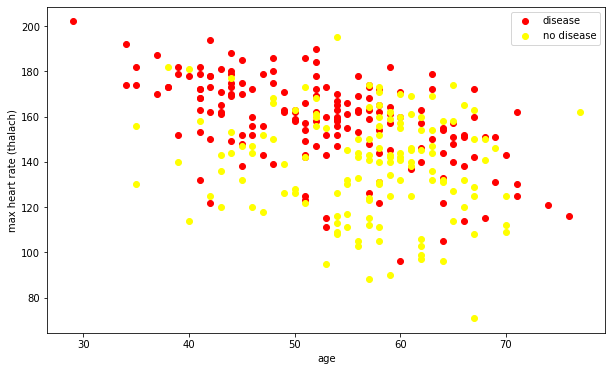

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

#scatter with positive examples
#age where target is 1

ax.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1],color='red');

ax.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0],color='yellow');

ax.legend(['disease','no disease'])

ax.set(xlabel='age',ylabel='max heart rate (thalach)');

We can't really tell much about the patterns based on the above graph.

Here is where ML models will help us better.


## Let's check the distribution of age using a histogram

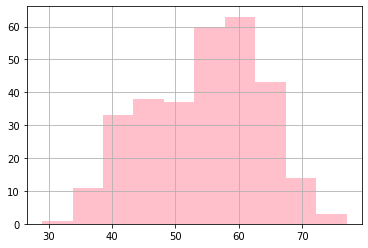

In [18]:
df['age'].hist(color="pink");

So , most of the people are around the age 55-65.We can check for outliers here.

In [19]:
#Heart disease frequency for chest pain type
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


People having cp2 and cp1 have more chances of getting a heart disease

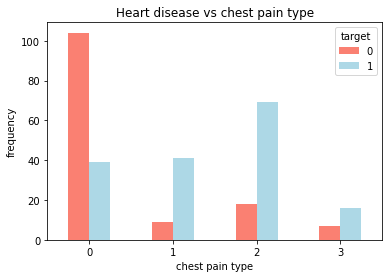

In [21]:
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['salmon','lightblue']);
plt.xlabel('chest pain type');
plt.title('Heart disease vs chest pain type');
plt.ylabel('frequency');
plt.xticks(rotation=0);

Finding correlations

In [22]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


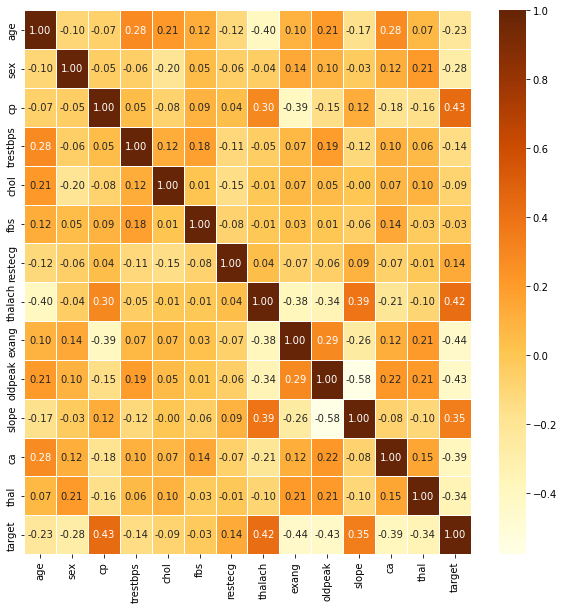

In [23]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
#plot using seaborn
ax=sns.heatmap(corr_matrix,
              annot=True,
              fmt=".2f",
              linewidth=0.5,
              cmap="YlOrBr")

Higher positive value,potential positive correlation
Higer negative value, potential negative correlation

For example, as cp goes up, target value also increases.Thus,positive correlation.

exang and target have negative correlation,i.e, if one parameter increases, the other decreases.

>This is the end of data analysis

# Builiding a ML model

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
#split data into X and y
X=df.drop('target',axis=1)
y=df['target']

In [26]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
#split data to train and test set
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [29]:
len(X_train),len(y_train)

(242, 242)

In [30]:
len(X_test)

61

In [31]:
y_train #observe that the values are mixed up

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Splitting of data is done. 

No null or non-numerical values. 

So, we can proceed to choosing a ML model

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

3 models used:
1)logistic regression
2)k-neibhors
3)Random forest classifier


In [32]:
#create a dictionary
models = {"logistic regression": LogisticRegression(),
          "k neighbors": KNeighborsClassifier(),
          "Random Forest Classifier":RandomForestClassifier()}
#fuction to fit and score models

models = {"logistic regression": LogisticRegression(),
          "k neighbors": KNeighborsClassifier(),
          "Random Forest Classifier":RandomForestClassifier()}
          "Random Forest Classifier":RandomForestClassifier()}
          "Random Forest Classifier":RandomForestClassifier()}


  
               
             
              
              
              

In [33]:
model_scores=fit_score(models,X_train,X_test,y_train,y_test)
model_scores

C:\Users\Home\Desktop\sample_project1\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.8852459016393442,
 'k neighbors': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918}

## comparing them visually

In [34]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])

In [35]:
model_compare

,logistic regression,k neighbors,Random Forest Classifier
accuracy,0.885246,0.688525,0.836066


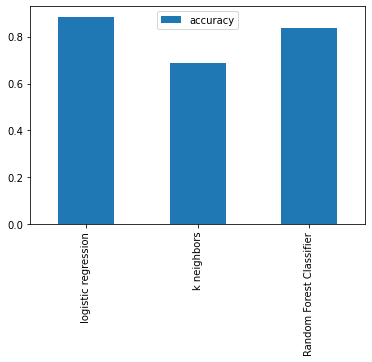

In [36]:
model_compare.T.plot.bar();

This is the baseline model. We'll try to improve it by using hyperparameter tuning & cross validation .Also find different metrices and feature imporatance

# hyperparameter tuning

In [37]:
# for KNN
model = KNeighborsClassifier()
train_scores=[]
test_scores=[]
for i in range(1,21):
    model.set_params(n_neighbors=i)
    model.fit(X_train,y_train)
    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_test,y_test))

In [38]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [39]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

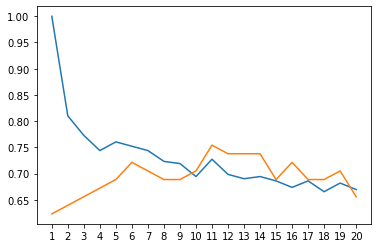

In [40]:
#to visualize
neighbors=range(1,21,1)
plt.plot(neighbors,train_scores,label="train scores")
plt.plot(neighbors,test_scores,label="test_scores")
plt.xticks(neighbors);

Still KNN gives less accuracy compared to other models, thus,we drop that model.

Tuning other models using RandomizedSearchCV

In [41]:
#grid for model1
log_grid = {"C":np.logspace(4,-4,21),
        "solver":['liblinear']}
#for model 2
ram_grid = {"n_estimators": np.arange(10,1000,50),
            "max_depth":[None,3,5,10],
            "min_samples_split":np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2)}

In [42]:
#tune logisticRegression
np.random.seed(42)
log_reg= RandomizedSearchCV(LogisticRegression(),
                            param_distributions=log_grid,
                            cv=5,
                            n_iter=20,
                           verbose=True)
log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e+04, 3.98107171e+03, 1.58489319e+03, 6.30957344e+02,
       2.51188643e+02, 1.00000000e+02, 3.98107171e+01, 1.58489319e+01,
       6.30957344e+00, 2.51188643e+00, 1.00000000e+00, 3.98107171e-01,
       1.58489319e-01, 6.30957344e-02, 2.51188643e-02, 1.00000000e-02,
       3.98107171e-03, 1.58489319e-03, 6.30957344e-04, 2.51188643e-04,
       1.00000000e-04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [43]:
log_reg.best_params_

{'solver': 'liblinear', 'C': 1.0}

In [44]:
log_reg.score(X_test,y_test)

0.8688524590163934

In [45]:
np.random.seed(42)
ran_reg= RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=ram_grid,
                            cv=5,
                            n_iter=20,
                           verbose=True)
ran_reg.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [46]:
ran_reg.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [47]:
ran_reg.score(X_test,y_test)

0.8688524590163934

Since the default score of logistic regression is greater, we eliminate random forest.

In [48]:
#grid search for model 1

grid = {"C":np.logspace(4,-4,30),
        "solver":['liblinear']}

np.random.seed(42)
reg= GridSearchCV(LogisticRegression(),
                            param_grid=grid,
                            cv=5,
                           verbose=True)
reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+04, 5.29831691e+03, 2.80721620e+03, 1.48735211e+03,
       7.88046282e+02, 4.17531894e+02, 2.21221629e+02, 1.17210230e+02,
       6.21016942e+01, 3.29034456e+01, 1.74332882e+01, 9.23670857e+00,
       4.89390092e+00, 2.59294380e+00, 1.37382380e+00, 7.27895384e-01,
       3.85662042e-01, 2.04335972e-01, 1.08263673e-01, 5.73615251e-02,
       3.03919538e-02, 1.61026203e-02, 8.53167852e-03, 4.52035366e-03,
       2.39502662e-03, 1.26896100e-03, 6.72335754e-04, 3.56224789e-04,
       1.88739182e-04, 1.00000000e-04]),
                         'solver': ['liblinear']},
             verbose=True)

In [49]:
reg.best_params_

{'C': 0.20433597178569438, 'solver': 'liblinear'}

In [50]:
reg.score(X_test,y_test)

0.8852459016393442

# Different evaluation using:
1)ROC AUC curve
2)classification report
3)confusion matrix
4)Precision
5)recall
6)F1 score

In [51]:
#to evaluate trained model we need to make predictions

y_preds= reg.predict(X_test)
y_preds


array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\Users\Home\Desktop\sample_project1\heart_disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


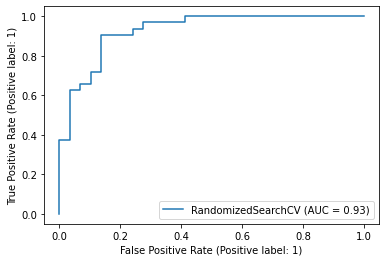

In [53]:
#plot roc curve and calculate auc metric

plot_roc_curve(log_reg,X_test,y_test)

In [54]:
#confusion matrix

print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


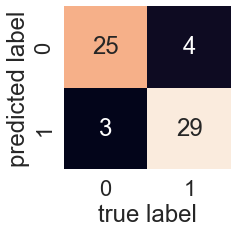

In [55]:
sns.set(font_scale=2)
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False);
plt.xlabel("true label");
plt.ylabel("predicted label");

basic classification report

In [56]:
print(classification_report(y_test ,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



classification report using cross validation

In [57]:
# we do this on best model with best hyperparameters

In [58]:
reg.best_params_

{'C': 0.20433597178569438, 'solver': 'liblinear'}

In [59]:
# creating a new classifier with the best parameters

clf = LogisticRegression(C= 0.20433597178569438, solver= 'liblinear')

In [60]:
#cross validated accuracy

cv_acc = cross_val_score(clf , X,y,scoring = "accuracy")
np.mean(cv_acc)

0.8446994535519124

In [61]:
# cross validated precision

cv_precision = cross_val_score(clf , X,y,scoring = "precision")
np.mean(cv_precision)

0.8207936507936507

In [62]:
cv_f1 = cross_val_score(clf , X,y,scoring = "f1")
np.mean(cv_f1)

0.8673007976269721

In [63]:
cv_recall = cross_val_score(clf , X,y,scoring = "recall")
np.mean(cv_recall)

0.9212121212121213

In [64]:
# Visualise the cross validated evaluation metrices

cv_metrices = pd.DataFrame({'accuracy':np.mean(cv_acc), 'precision':np.mean(cv_precision),'f1_score':np.mean(cv_f1),'recall':np.mean(cv_recall)} , index = [0])

In [65]:
cv_metrices

,accuracy,precision,f1_score,recall
0,0.844699,0.820794,0.867301,0.921212


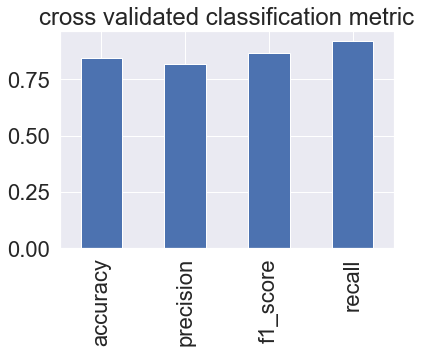

In [66]:
cv_metrices.T.plot.bar(title="cross validated classification metric",legend=False);

# feature importance

finding feature importance is different for every ML model

Feature importance for logistic regression



In [67]:
clf = LogisticRegression(C= 0.20433597178569438, solver= 'liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569438, solver='liblinear')

In [68]:
clf.coef_

array([[ 0.00320768, -0.86062028,  0.6600142 , -0.01155971, -0.00166496,
         0.04017283,  0.31603351,  0.02458922, -0.60470159, -0.56795458,
         0.45085372, -0.63733314, -0.67555028]])

In [69]:
# match features to columns
feature_dict= dict(zip(df.columns,clf.coef_[0]))
feature_dict

{'age': 0.003207675627369096,
 'sex': -0.860620276622785,
 'cp': 0.6600142031968856,
 'trestbps': -0.011559708966881063,
 'chol': -0.0016649594248895738,
 'fbs': 0.040172833463416706,
 'restecg': 0.3160335083153701,
 'thalach': 0.024589216746261133,
 'exang': -0.6047015935762763,
 'oldpeak': -0.567954578412684,
 'slope': 0.450853720186495,
 'ca': -0.6373331429071435,
 'thal': -0.6755502801545402}

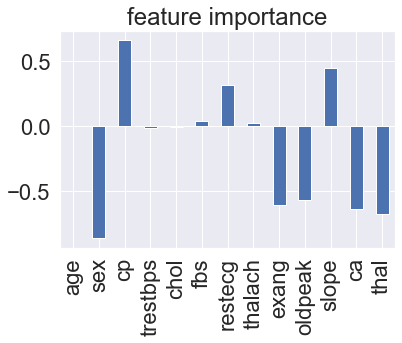

In [70]:
#visualize feature importance

feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title="feature importance",legend = False);

In [71]:
# try to make some insights

pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [72]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


We can exclude the features not contributing , or combine some features 

# experimentation

 If you have'nt hit your evaluation metric :

>could you collect more data?

>could you try new models? like catboost , XGboost

>could you still more improve your current model

If you rocked it :3 
>export and share

In [83]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1)
clf.fit(X_train , y_train)

0:	learn: 0.6629832	total: 396ms	remaining: 1.58s
1:	learn: 0.6377309	total: 399ms	remaining: 599ms
2:	learn: 0.6151428	total: 402ms	remaining: 268ms
3:	learn: 0.5961557	total: 407ms	remaining: 102ms
4:	learn: 0.5767750	total: 409ms	remaining: 0us


In [75]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
print(clf.get_best_score())

{'learn': {'Logloss': 0.5767749755004467}}


In [85]:
clf.score(X_train,y_train)

0.871900826446281